### This example showcases the various strategies employed in KBinsDiscretizer:

- *uniform*: This strategy ensures a uniform discretization across each feature, implying that the widths of the bins remain constant in every dimension.

- *quantile*: This strategy performs discretization based on quantile values, ensuring that each bin contains roughly the same number of samples.

- *kmeans*: This strategy carries out discretization based on the centroids derived from a KMeans clustering process."

c:\Users\danyb\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\danyb\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\danyb\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\danyb\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

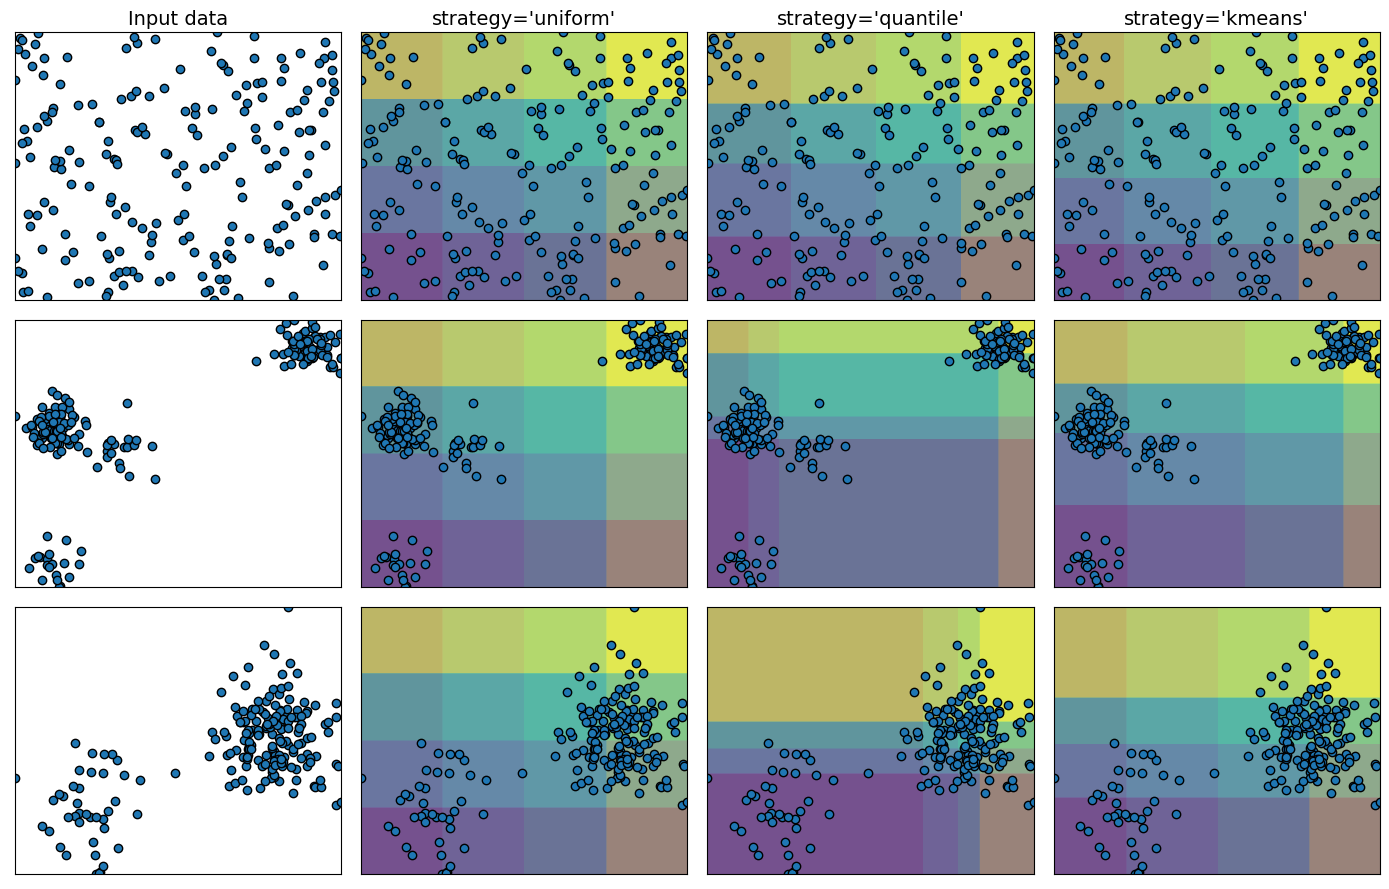

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer

strategies = ["uniform", "quantile", "kmeans"]

n_samples = 200
centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])

# construct the datasets
random_state = 42
X_list = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)),
    make_blobs(
        n_samples=[
            n_samples // 10,
            n_samples * 4 // 10,
            n_samples // 10,
            n_samples * 4 // 10,
        ],
        cluster_std=0.5,
        centers=centers_0,
        random_state=random_state,
    )[0],
    make_blobs(
        n_samples=[n_samples // 5, n_samples * 4 // 5],
        cluster_std=0.5,
        centers=centers_1,
        random_state=random_state,
    )[0],
]

figure = plt.figure(figsize=(14, 9))
i = 1
for ds_cnt, X in enumerate(X_list):
    ax = plt.subplot(len(X_list), len(strategies) + 1, i)
    ax.scatter(X[:, 0], X[:, 1], edgecolors="k")
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(X_list), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=0.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=0.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors="k")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy,), size=14)

        i += 1

plt.tight_layout()
plt.show()